# Classification of the IRIS Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df_iris = pd.read_csv(url, names=feature_names)

In [ ]:
# Basic information about the dataset
print("Sample data from the Iris dataset:")
print(df_iris.head())
print("\nDataset information:")
print(df_iris.info())
print("\nDescriptive statistics:")
print(df_iris.describe())

Sample data from the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Descriptive statistics:
       sepal_length  sepal_width  petal_le

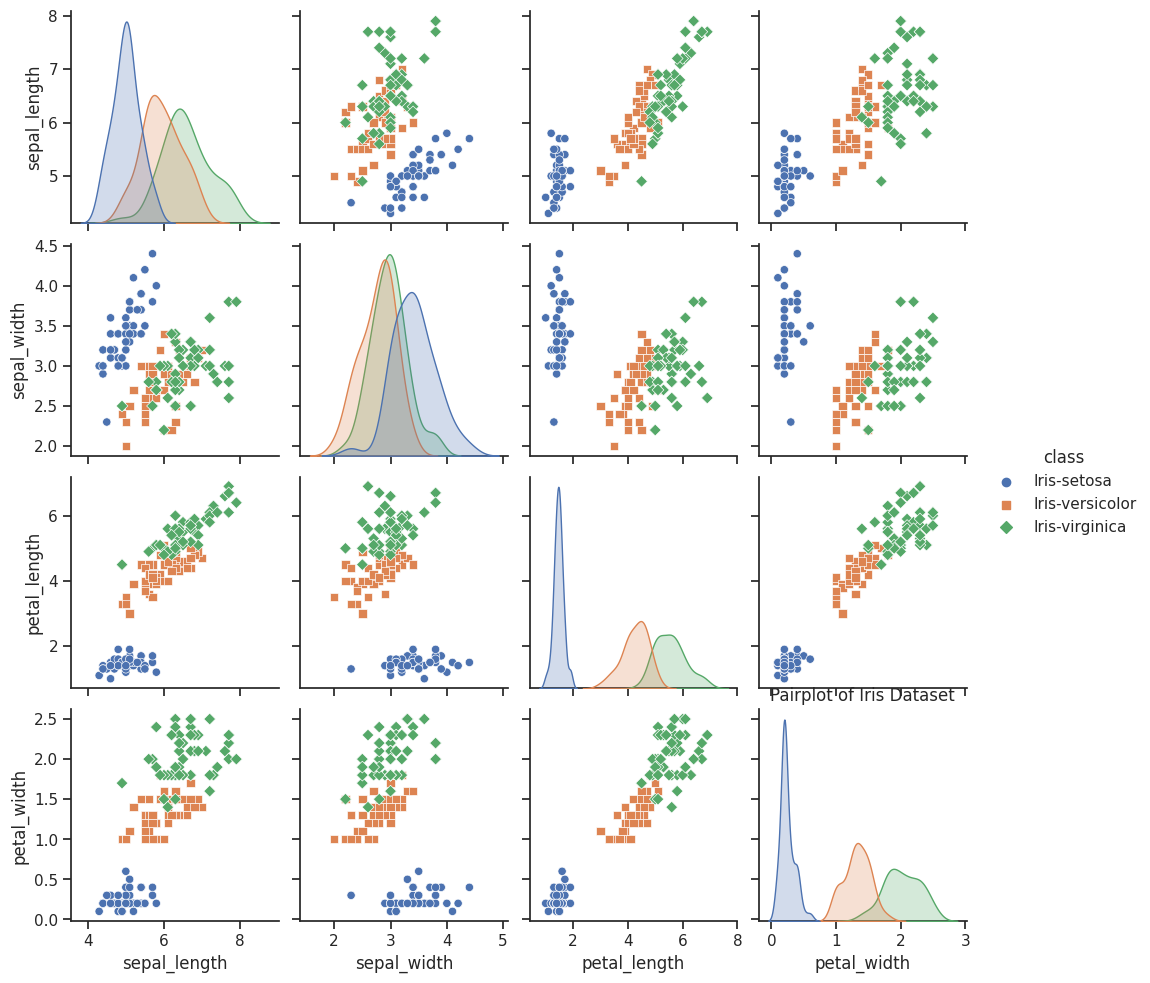

In [ ]:
# Visualize the dataset
sns.set(style="ticks")
sns.pairplot(df_iris, hue="class", markers=["o", "s", "D"])
plt.title("Pairplot of Iris Dataset")
plt.show()


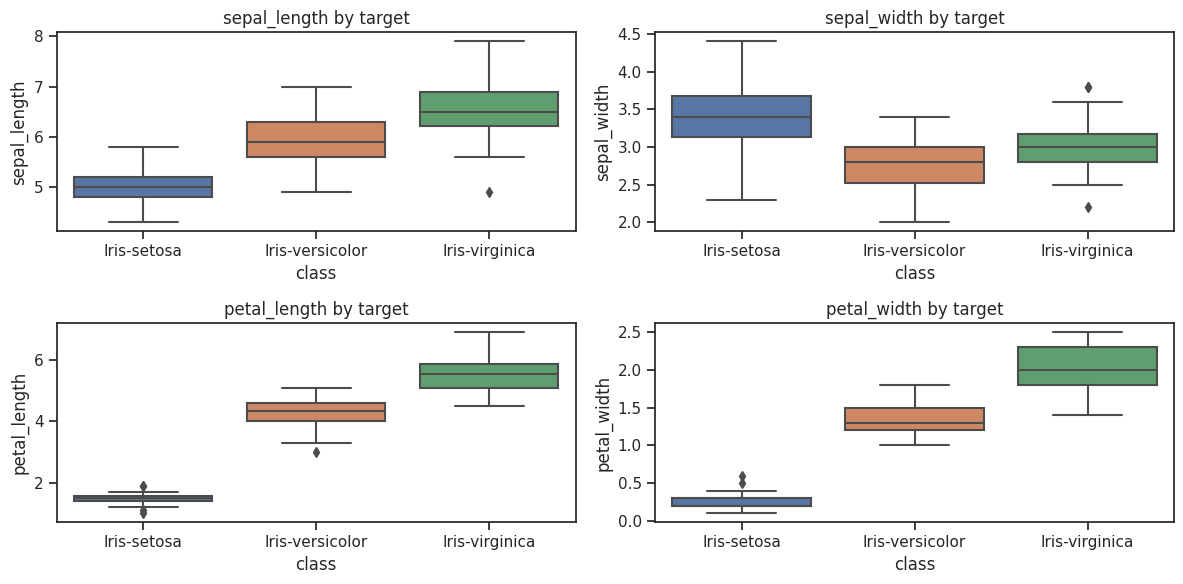

In [ ]:
# Box plots for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(feature_names[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="class", y=feature, data=df_iris)
    plt.title(f"{feature} by target")
plt.tight_layout()
plt.show()

<ipython-input-19-1e46aa62100d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_iris.corr()


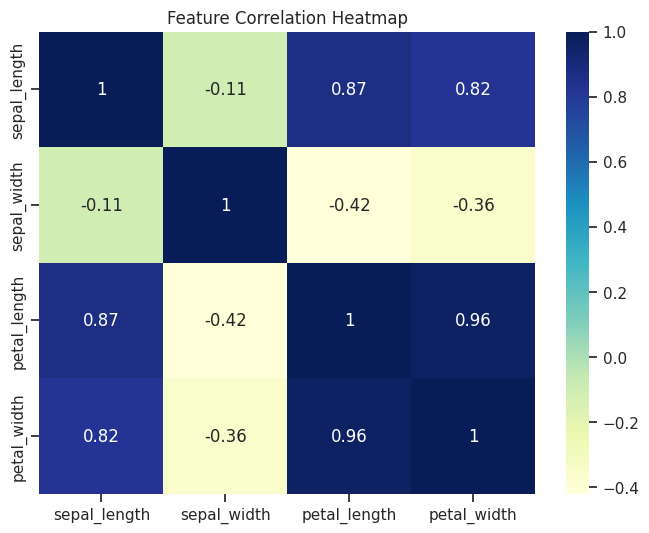

In [ ]:
# Correlation heatmap
correlation_matrix = df_iris.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

#Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Load the Iris dataset from sklearn

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

#Data Preprocessing and Cleaning

# 1. Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Standardize the Features (mean = 0, variance = 1)
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

# 3. Split the Data into Training and Testing Sets
X = data.iloc[:, :-1]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


# Validation - For Tuning HyperParameters

##SVM

##Decision Tree

##Multi Layer Perceptron

##Logistic Regression

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.882 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.941 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

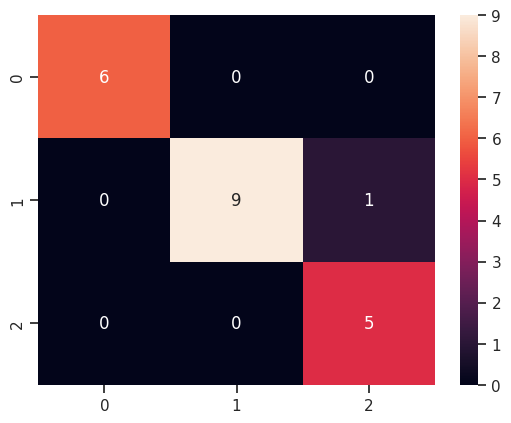

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data into training and testing sets
# test size here means validation size
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for the SVM
param_grid_SVC = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Create the SVM model
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid_SVC, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_val, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.882 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=1.000 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=1.000 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.882 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.938 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.882 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.941 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=1.000 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.882 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.938 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.882 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;

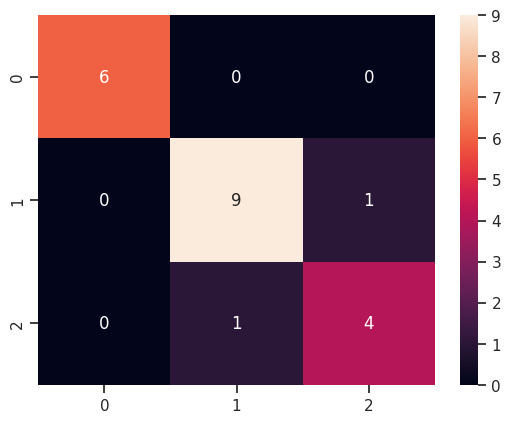

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
# test size here means validation size
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for the Decision Tree
param_DT = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9]}

# Create the Decision Tree model
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_DT, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_val, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.882 total time=   0.4s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=1.000 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=1.000 total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.882 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.938 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.882 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=1.000 total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=1.000 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.882 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.938 total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.882 total time=   0.5s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=1.000 total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=1.000 total time=   0.6s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.882 total time=   0.6s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.938 total time=   0.6s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.824 total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.882 total time=   0.4s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=1.000 total time=   0.4s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=1.000 total time=   0.4s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.882 total time=   0.4s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.938 total time=   0.4s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.882 total time=   0.4s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=1.000 total time=   0.4s
[CV 3/5] END 

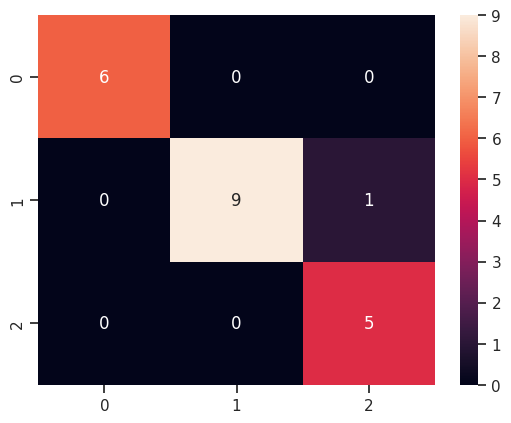

In [ ]:
from sklearn.neural_network import MLPClassifier


# Split the data into training and testing sets\
# test size here means validation size
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for Multilayer Perceptron
param_MLPC = {
    'hidden_layer_sizes': [(50,),(100,),(50,50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

# Create the Multilayer Perceptron model
mlp = MLPClassifier(max_iter=1000)

# Perform grid search with cross-validation

grid_search = GridSearchCV(mlp, param_MLPC, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_val, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.515 total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.539 total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.536 total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.531 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END ................C=0.01, penalty=l2;, score=0.555 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.528 total time=   0.1s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.559 total time=   0.1s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.527 total time=   0.1s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.524 total time=   0.1s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.555 total time=   0.1s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.530 total time=   0.1s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.568 total time=   0.1s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.527 total time=   0.1s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.531 total time=   0.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.549 total time=   0.1s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.530 total time=   0.2s
[CV 2/5] END ...............

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


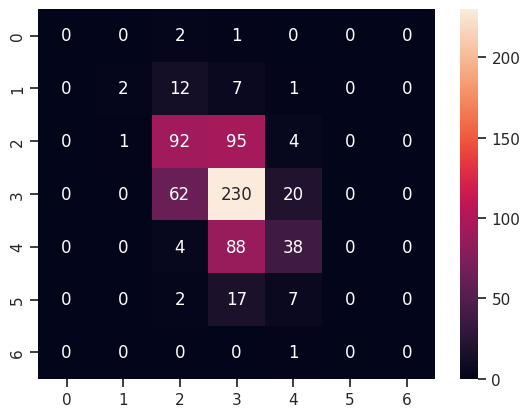

In [ ]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
# test size here means validation size
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for Logistic Regression
param_LR = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Create the Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='lbfgs')

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_LR, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_val, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


#Classification using all four Classifiers with K-Fold Cross Validation

Logistic Regression Mean Accuracy: 0.538796365261433
SVM Mean Accuracy: 0.562422591560086
Decision Tree Mean Accuracy: 0.523630056819391


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

MLP Mean Accuracy: 0.5481317699133876


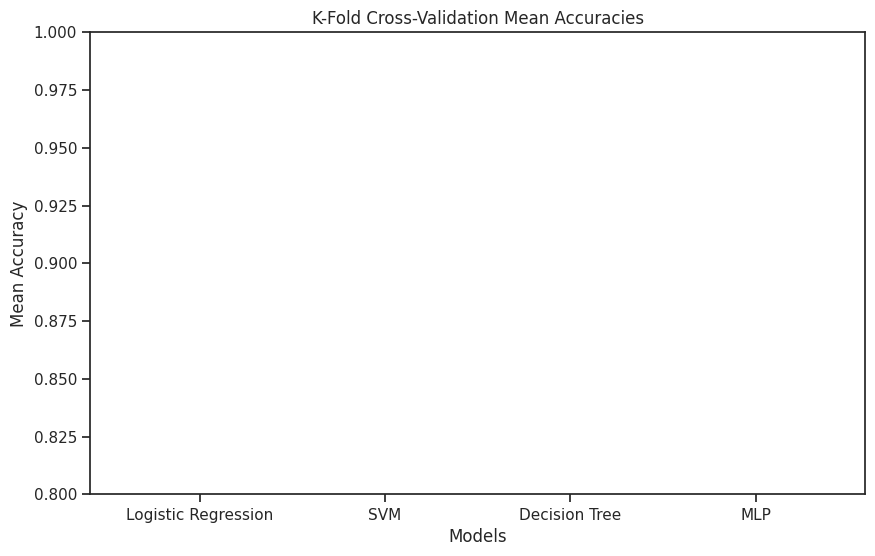


Test Set Accuracy:
Logistic Regression: 0.5380952380952381
SVM: 0.5544217687074829
Decision Tree: 0.5251700680272109
MLP: 0.5585034013605442


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold



# Create and evaluate models using K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, C=10, penalty='l2')
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='accuracy')
print("Logistic Regression Mean Accuracy:", np.mean(lr_scores))

# Support Vector Machine
svm_model = SVC(C=100, gamma=0.01, kernel='rbf')
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')
print("SVM Mean Accuracy:", np.mean(svm_scores))

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth = 3)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=kfold, scoring='accuracy')
print("Decision Tree Mean Accuracy:", np.mean(dt_scores))

# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier(max_iter=1000, activation='logistic', alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate='constant', solver='adam')
mlp_scores = cross_val_score(mlp_model, X_train, y_train, cv=kfold, scoring='accuracy')
print("MLP Mean Accuracy:", np.mean(mlp_scores))

# Create a bar plot to visualize K-fold cross-validation results
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'MLP']
mean_accuracies = [np.mean(lr_scores), np.mean(svm_scores), np.mean(dt_scores), np.mean(mlp_scores)]

plt.figure(figsize=(10, 6))
plt.bar(models, mean_accuracies, color='skyblue')
plt.title('K-Fold Cross-Validation Mean Accuracies')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

# Compare the performance of the models on the test set
lr_model.fit(X_train, y_train)
lr_test_accuracy = lr_model.score(X_test, y_test)

svm_model.fit(X_train, y_train)
svm_test_accuracy = svm_model.score(X_test, y_test)

dt_model.fit(X_train, y_train)
dt_test_accuracy = dt_model.score(X_test, y_test)

mlp_model.fit(X_train, y_train)
mlp_test_accuracy = mlp_model.score(X_test, y_test)

print("\nTest Set Accuracy:")
print("Logistic Regression:", lr_test_accuracy)
print("SVM:", svm_test_accuracy)
print("Decision Tree:", dt_test_accuracy)
print("MLP:", mlp_test_accuracy)


#Regression using the Wine Quality Dataset

##Visualisation

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Fetch the Wine Quality Dataset from OpenML
# wine_data = fetch_openml(data_id=187)

# # Convert the data and target to a DataFrame
# wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
# wine_df['quality'] = wine_data.target
# print(wine_data.target)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

data = pd.read_csv(url, sep=';')

# Extract the features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
# Basic information about the dataset
print(X.head())
print(X.info())
print(X.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
<class '

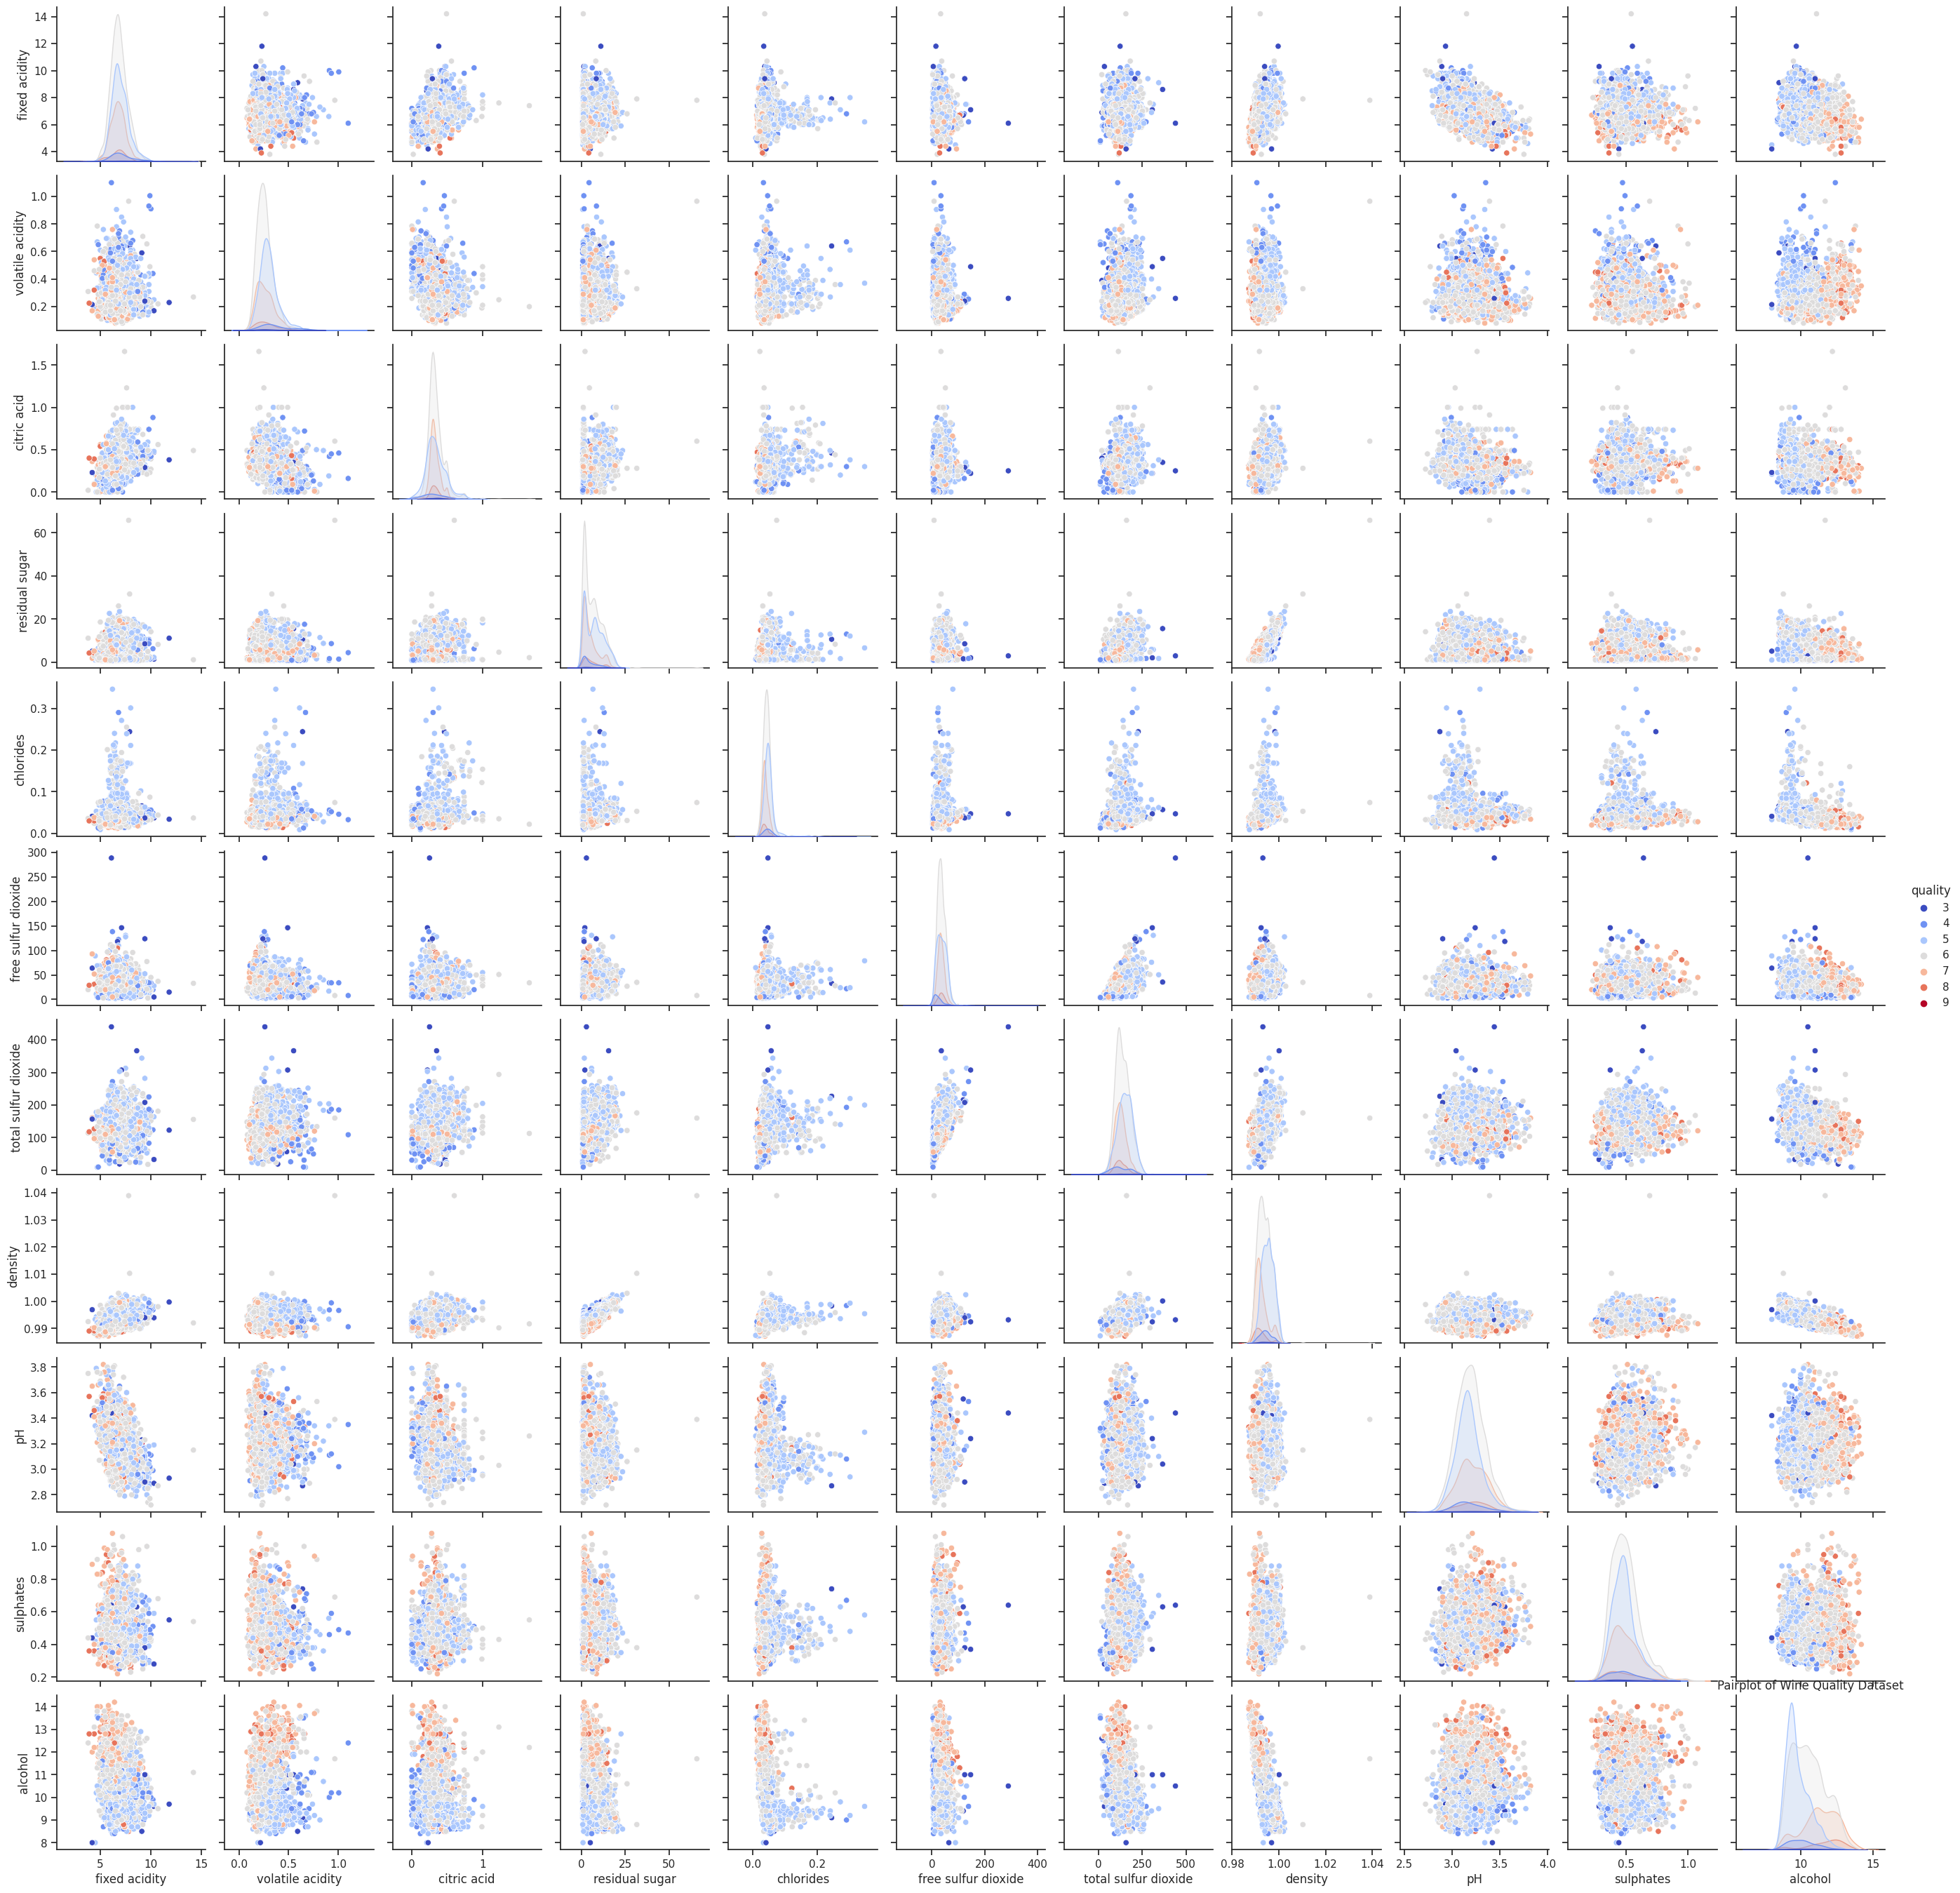

In [ ]:
# Pairplot for data visualization
sns.pairplot(data, hue="quality", palette="coolwarm")
plt.title("Pairplot of Wine Quality Dataset")
plt.show()


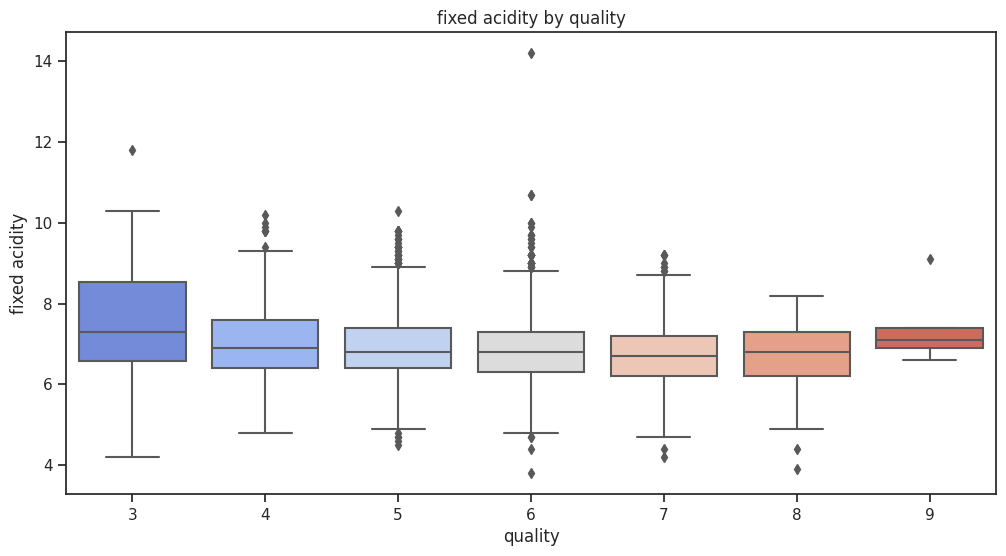

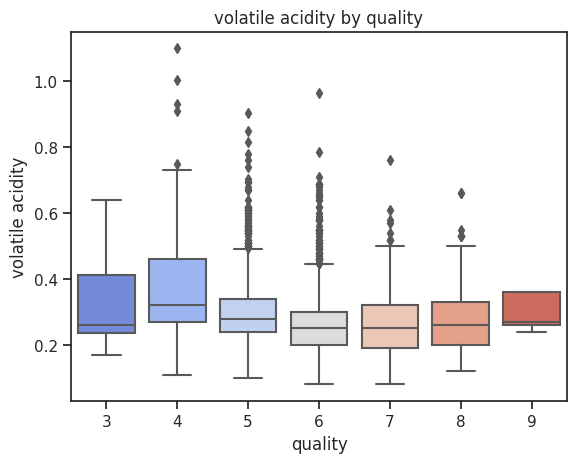

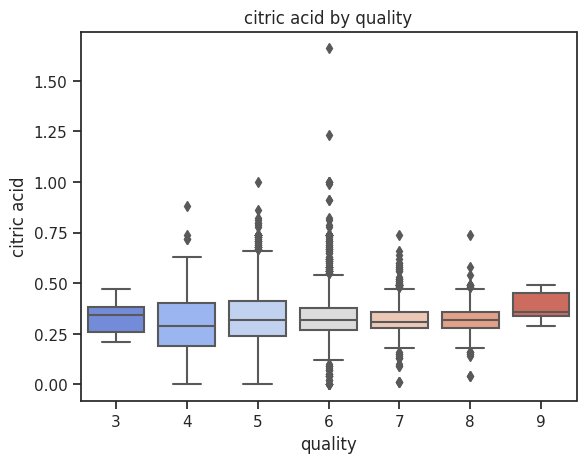

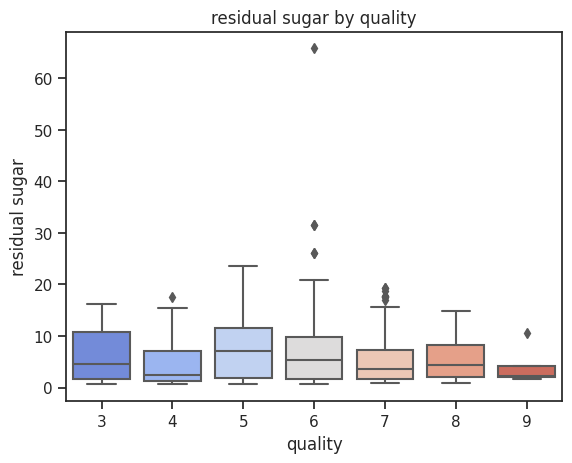

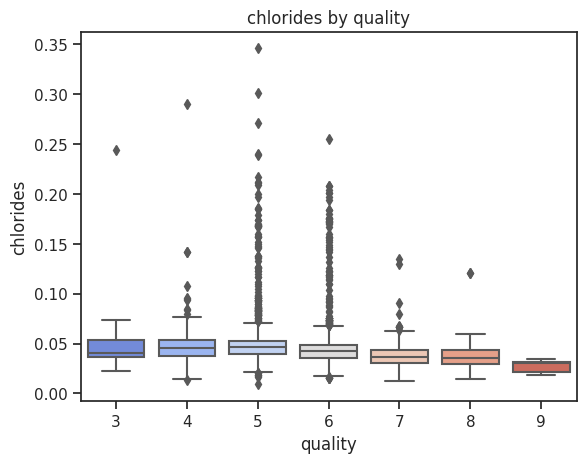

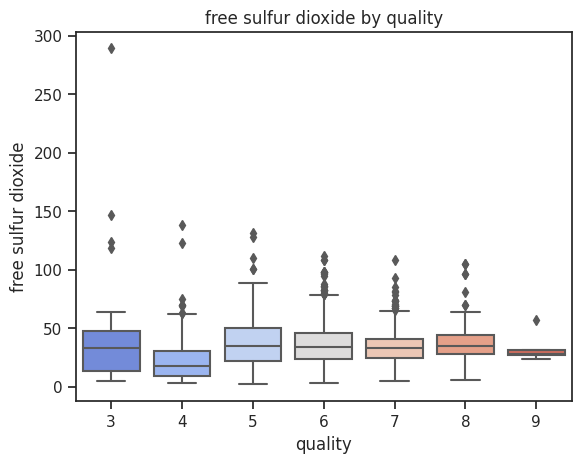

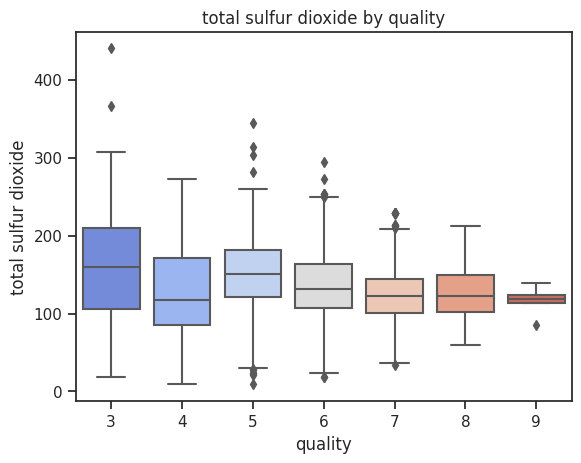

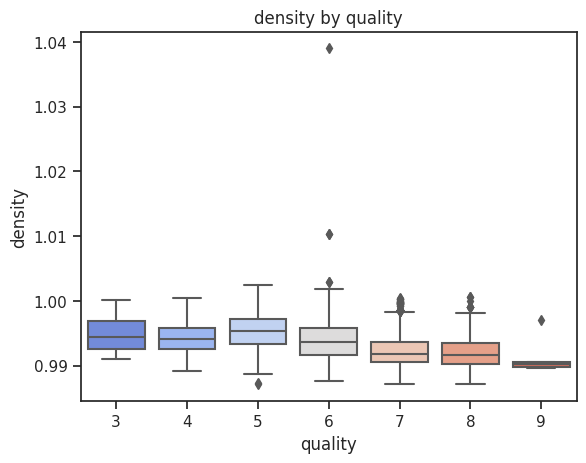

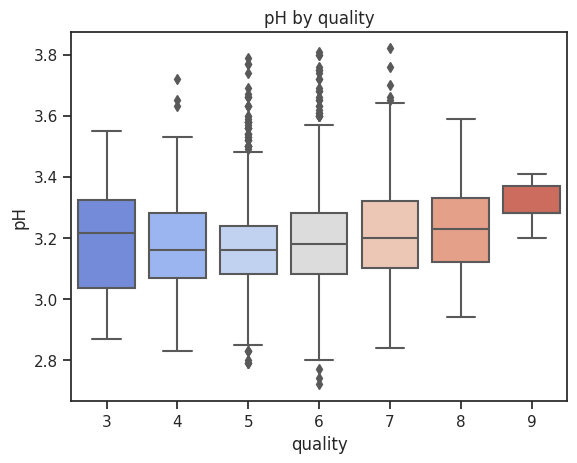

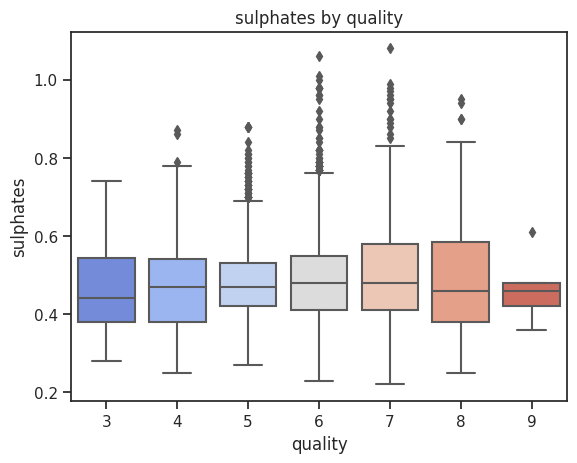

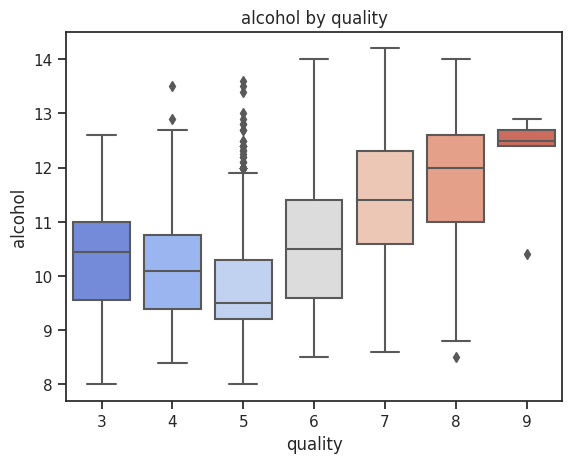

In [ ]:
# Box plots for each feature
plt.figure(figsize=(12, 6))
for feature in X:  # Exclude the 'quality' column
    sns.boxplot(x="quality", y=feature, data=data, palette="coolwarm")
    plt.title(f"{feature} by quality")
    plt.show()

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Data Preprocessing and Cleaning

# 1. Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Standardize the Features (mean = 0, variance = 1)
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
print(data.iloc[:, :-1])
# 3. Split the Data into Training and Testing Sets
X = data.iloc[:, :-1]
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.172097         -0.081770     0.213280        2.821349  -0.035355   
1         -0.657501          0.215896     0.048001       -0.944765   0.147747   
2          1.475751          0.017452     0.543838        0.100282   0.193523   
3          0.409125         -0.478657    -0.117278        0.415768   0.559727   
4          0.409125         -0.478657    -0.117278        0.415768   0.559727   
...             ...               ...          ...             ...        ...   
4893      -0.776015         -0.677101    -0.365197       -0.944765  -0.310008   
4894      

# All four Regression Models


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for SVM
param_SVR = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Create the SVM model
svm = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_SVR, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Calculate the model performance
mse = mean_squared_error(y_test_val, y_pred)
r2 = r2_score(y_test_val, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.142 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.135 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.147 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.132 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.146 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.296 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.251 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.217 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.315 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.302 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.361 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for Decision Tree Regression
param_DT = {'max_depth': [3, 5, 7]}

# Create the Decision Tree Regression model
dt = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_DT, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Calculate the model performance
mse = mean_squared_error(y_test_val, y_pred)
r2 = r2_score(y_test_val, y_pred)

# Print the performance metrics

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................max_depth=3;, score=0.261 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.222 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.225 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.329 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.248 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.293 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.205 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.280 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.299 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.279 total time=   0.0s
[CV 1/5] END .......................max_depth=7;, score=0.273 total time=   0.0s
[CV 2/5] END .......................max_depth=7;,

In [ ]:
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train_val, y_train_val)

# Make predictions
y_pred = lr.predict(X_test_val)

# Calculate the model performance
mse = mean_squared_error(y_test_val, y_pred)
r2 = r2_score(y_test_val, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.5885376985580572
R2 Score: 0.25886142148614555


In [ ]:
from sklearn.neural_network import MLPRegressor

# Split the data into training and testing sets
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid for MLPRegressor
param_MLPR = {
    'hidden_layer_sizes': [(50,),(100,),(50,50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

# Create the MLPRegressor model
mlp = MLPRegressor(max_iter=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_MLPR, refit=True, verbose=3, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
y_pred = grid_search.predict(X_test_val)

# Calculate the model performance
mse = mean_squared_error(y_test_val, y_pred)
r2 = r2_score(y_test_val, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.369 total time=  22.4s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.263 total time=   0.8s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.300 total time=   0.6s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.368 total time=  12.9s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.321 total time=  10.4s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.293 total time=   1.3s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learni

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.366 total time=  13.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam;, score=0.234 total time=   1.3s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.294 total time=   0.9s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.261 total time=   1.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.300 total time=   0.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.321 total time=   1.7s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam;, score=0.233 total time=  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.180 total time=  38.4s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.369 total time=   9.5s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.358 total time=  14.4s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.341 total time=  12.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam;, score=0.304 total time=  17.6s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.361 total time=   7.7s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam;, score=0.351 total time=   3.5s
[CV 3/5] END act

Linear Regression MSE: 0.5606180883456092
Support Vector Machine MSE: 0.5104223776801203
Decision Tree MSE: 0.5824000755234845


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network MSE: 0.5526494202102346


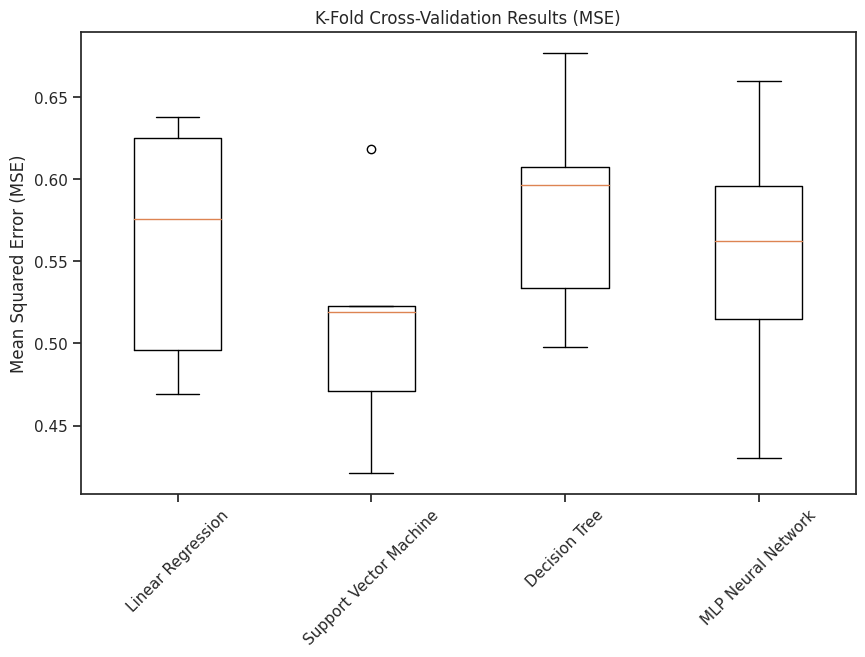

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target (y)

X = data.iloc[:, :-1]
y = y

# Define the regression models
linear_reg = LinearRegression()
svr = SVR(C=1, gamma=0.1, kernel='rbf')
dt_regressor = DecisionTreeRegressor(max_depth=3)
mlp_regressor = MLPRegressor(max_iter=1000, activation='relu', alpha=0.05, hidden_layer_sizes=(100,), learning_rate='adaptive', solver='adam')

# Create a list of models
models = [linear_reg, svr, dt_regressor, mlp_regressor]
model_names = ["Linear Regression", "Support Vector Machine", "Decision Tree", "MLP Neural Network"]

# Apply K-fold cross-validation (K is determined by the number of splits)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []

for model, name in zip(models, model_names):
    mse = -cross_val_score(model, X_test, y_test, cv=kfold, scoring='neg_mean_squared_error')
    mse_scores.append(mse)
    print(f"{name} MSE: {np.mean(mse)}")

# Visualize the K-fold cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(mse_scores, labels=model_names)
plt.title("K-Fold Cross-Validation Results (MSE)")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.show()



Parameter optimization / hyperparameter tuning allows us to find a set of best hyperparameters in order to build the most optimized model for machine learning or deep learning to attain the best accuracy.

Here we are using grid search based approach that extensively runs the algorithm again and again for the set of parameters the user wants to tune from and then the grid search algorithm runs for all possible permutations of the hyperparameters in order to find the best heperparameters.